In [1]:
%matplotlib inline
import pickle
import sncosmo
import numpy as np
import matplotlib.pyplot as plt
sncosmo.__version__

'1.6.0'

In [2]:
infile = 'outSED/SED-Iax-0005.dat'
p, w, f = np.genfromtxt(infile,unpack=True)

phase = np.unique(p)
nphase = len(phase)
wave = np.unique(w)
nwave = len(wave)
flux = f.reshape((nphase,nwave))

sedmodel = sncosmo.Model(source=sncosmo.TimeSeriesSource(phase,wave,flux))

print(sedmodel.bandmag('bessellv','vega',0.0))
print(sedmodel.bandmag('bessellb','vega',15.0)-sedmodel.bandmag('bessellb','vega',0.0))
print(sedmodel.bandmag('bessellr','vega',15.0)-sedmodel.bandmag('bessellr','vega',0.0))

-17.6163181411
1.15796209201
0.370558639592


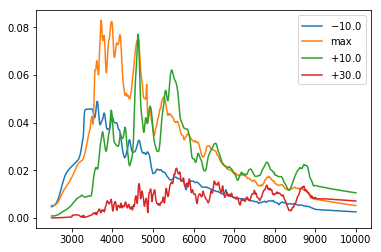

In [3]:
# spectra

w = np.linspace(2500,10000,750)
plt.plot(w,sedmodel.flux(-10.0,wave=w),label=r'$-$10.0')
plt.plot(w,sedmodel.flux(0.0,wave=w),label='max')
plt.plot(w,sedmodel.flux(10.0,wave=w),label=r'$+$10.0')
plt.plot(w,sedmodel.flux(30.0,wave=w),label=r'$+$30.0')
plt.legend()
plt.show()

/usr/local/anaconda/lib/python3.6/site-packages/sncosmo/models.py:187: RuntimeWarning: invalid value encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)


-17.6761452621


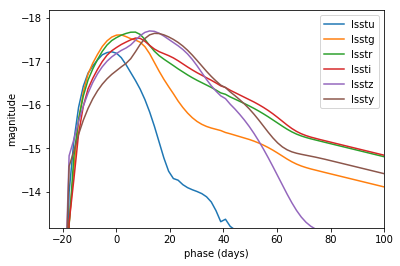

In [4]:
# light curves
filters = ['lsstu','lsstg','lsstr','lssti','lsstz','lssty']
colors = ['purple','green','red','black','brown','blue']

phase = np.linspace(-30.,200.,131)

plt.plot()
for f in filters:
    band = sncosmo.get_bandpass(f)
    sedmag = sedmodel.bandmag(band,'ab',phase)
    if f == 'lsstr':
        pkmag = np.nanmin(sedmag)
        print(pkmag)
    plt.plot(phase,sedmag,label=f)
plt.xlim(-25,100)
plt.ylim(pkmag+4.5,pkmag-0.5)
plt.xlabel('phase (days)')
plt.ylabel('magnitude')
plt.legend()
plt.show()

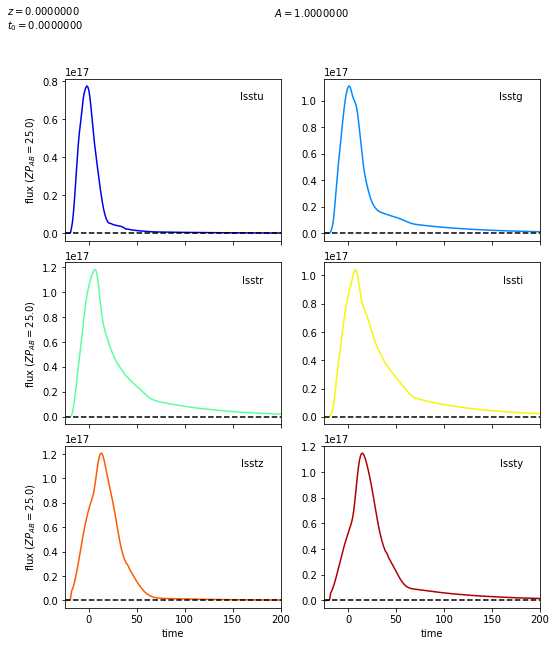

In [5]:
figure = sncosmo.plot_lc(model=sedmodel,bands=filters)